# Assignment 2

In [19]:
import numpy as np
import pandas as pd
import pickle

from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [55]:
train_images = pickle.load( open( "../imagenet-200/train_images.pkl", "rb" ) )
train_labels = pickle.load( open( "../imagenet-200/train_labels.pkl", "rb" ) )
val_images = pickle.load( open( "../imagenet-200/val_images.pkl", "rb" ) )
val_labels = pickle.load( open( "../imagenet-200/val_labels.pkl", "rb" ) )

In [31]:
text_labels = pd.read_csv('../imagenet-200/map_clsloc.txt', sep='\s', header=None, engine='python')
text_labels.columns=['label', 'id', 'description']
text_labels.head()

,label,id,description
0,n02119789,1,kit_fox
1,n02100735,2,English_setter
2,n02110185,3,Siberian_husky
3,n02096294,4,Australian_terrier
4,n02102040,5,English_springer


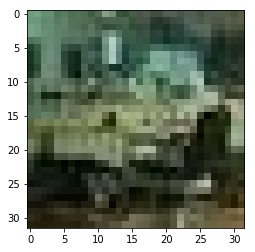

704    barbershop
Name: description, dtype: object


In [56]:
plotData = train_images[0]
plt.imshow(plotData)
plt.show()
print(text_labels.loc[text_labels['label']==train_labels[0], 'description'])

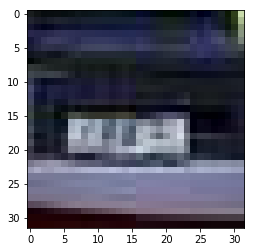

547    cash_machine
Name: description, dtype: object


In [57]:
plotData = val_images[0]
plt.imshow(plotData)
plt.show()
print(text_labels.loc[text_labels['label']==val_labels[0], 'description'])

### Shuffle the training data

In [58]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=41)

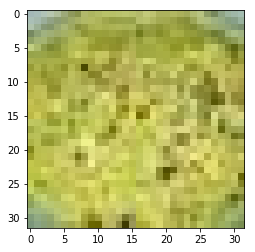

812    guacamole
Name: description, dtype: object


In [59]:
plotData = train_images[0]
plt.imshow(plotData)
plt.show()
print(text_labels.loc[text_labels['label']==train_labels[0], 'description'])

In [60]:
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')
train_images /= 255
val_images /= 255


In [ ]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Experiment 1: Keras CNN

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard, TerminateOnNaN, LearningRateScheduler, Callback
import tensorflow as tf
from keras import backend as K

from time import time

In [ ]:
tensorboard = TensorBoard(log_dir="logs/0/{}".format(time()))
tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


model_base = Sequential()
model_base.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_base.add(Activation('relu'))
model_base.add(Conv2D(32, (3, 3)))
model_base.add(Activation('relu'))
model_base.add(MaxPooling2D(pool_size=(2, 2)))
model_base.add(Dropout(0.25))

model_base.add(Conv2D(64, (3, 3), padding='same'))
model_base.add(Activation('relu'))
model_base.add(Conv2D(64, (3, 3)))
model_base.add(Activation('relu'))
model_base.add(MaxPooling2D(pool_size=(2, 2)))
model_base.add(Dropout(0.25))

model_base.add(Flatten())
model_base.add(Dense(512))
model_base.add(Activation('relu'))
model_base.add(Dropout(0.5))
model_base.add(Dense(num_classes))
model_base.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_lr.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

start = time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model_lr.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4,
                    steps_per_epoch=len(x_train)/batch_size, 
                    callbacks=[tensorboard])
